## GA-030 Estatística - Trabalho 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

### (a) Expectância e Variância Teóricas

Temos as seguintes variáveis aleatórias:

* Normal: $Q \sim \mathbb{N}(1, 2)$
* Uniforme: $X \sim \mathbb{U}[-3, 3]$
* Exponencial: $Y \sim \mathbb{E}(\lambda = 0,1)$
* Binomial: $T \sim \mathbb{B}(20; {0,20})$

Então, utilizando as definições:
| Expectância | Variância |
| - | - |
| $E[Q] = \mu_Q = 1$ | $Var[Q] = \sigma_Q^2 = 2$ |
| $E[X] = \dfrac{(a+b)}{2} = \dfrac{(-3+3)}{2} = 0$ | $Var[X] = \dfrac{(b-a)^2}{12} = \dfrac{36}{12} = 3$ |
| $E[Y] = \dfrac{1}{\lambda} = \dfrac{1}{0,1} = 10$ | $Var[Y] = \dfrac{1}{\lambda^2} = \dfrac{1}{0,1^2} = 100$ |
| $E[T] = Np = 20\cdot0,20 = 4$ | $Var[T] = Np(1-p) = 20\cdot0,20\cdot0,80 = 3,2$ |

In [2]:
params = {
    'normal': {'mu': 1, 'sigma^2': 2},
    'uniform': {'a': -3, 'b': 3},
    'exponential': {'lambda': 0.1},
    'binomial': {'N': 20, 'p': 0.20}
}

theoretical_values = {
    'normal': {'mu': 1, 'sigma^2': 2},
    'uniform': {'mu': 0, 'sigma^2': 3},
    'exponential': {'mu': 10, 'sigma^2': 100},
    'binomial': {'mu': 4, 'sigma^2': 3.2}
}

### (b) Expectância e Variância estimadas utilizando todo o conjunto de dados

In [3]:
data_q = np.fromfile('./dados/data1q.dat', sep='\n')
data_x = np.fromfile('./dados/data1x.dat', sep='\n')
data_y = np.fromfile('./dados/data1y.dat', sep='\n')
data_t = np.fromfile('./dados/data1t.dat', sep='\n')

In [4]:
data = {
    'normal': data_q,
    'uniform': data_x,
    'exponential': data_y,
    'binomial': data_t
}

random_variable_name = {
    'normal': 'Q',
    'uniform': 'X',
    'exponential': 'Y',
    'binomial': 'T'
}


In [5]:
for dist in data:
    print(data[dist].shape)

(1000000,)
(1000000,)
(1000000,)
(1000000,)


In [6]:
for dist in data:
    print(f"{random_variable_name[dist]}: média={data[dist].mean():.8f}, var={data[dist].var(ddof=1):.8f}")

Q: média=0.99953775, var=2.00302271
X: média=-0.00217247, var=3.00119156
Y: média=9.98905957, var=99.56633665
T: média=4.00196200, var=3.20480736


### (c) Histogramas das frequências relativas

In [7]:
def pdf_normal(x_range, mu, sigma):
    return [ (1 / (sigma * np.sqrt(2 * np.pi)))*np.exp(-0.5 * ((x - mu) / sigma) ** 2)  for x in x_range ]

def pdf_uniform(x_range, a, b):
    return [ 1 / (b - a) if ((x>=a) and (x<=b)) else 0. for x in x_range]

def pdf_exponential(x_range, _lambda):
    return [ _lambda*np.exp(-_lambda * x) for x in x_range ]

def pdf_chi2(x_range, n):
    coeff = 1 / ((2**(n/2)) * math.gamma(n/2))
    return [ coeff*(x**((n/2)-1))*np.exp(-x/2)  if x>=0. else 0. for x in x_range ]

def pmf_binomial(x_range, N, p):
    return [ math.comb(N, x) * (p**x) * ((1-p)**(N-x)) for x in x_range ]

In [8]:
color = {
    'normal': 'red',
    'uniform': 'blue',
    'exponential': 'green',
    'binomial': 'purple'
}

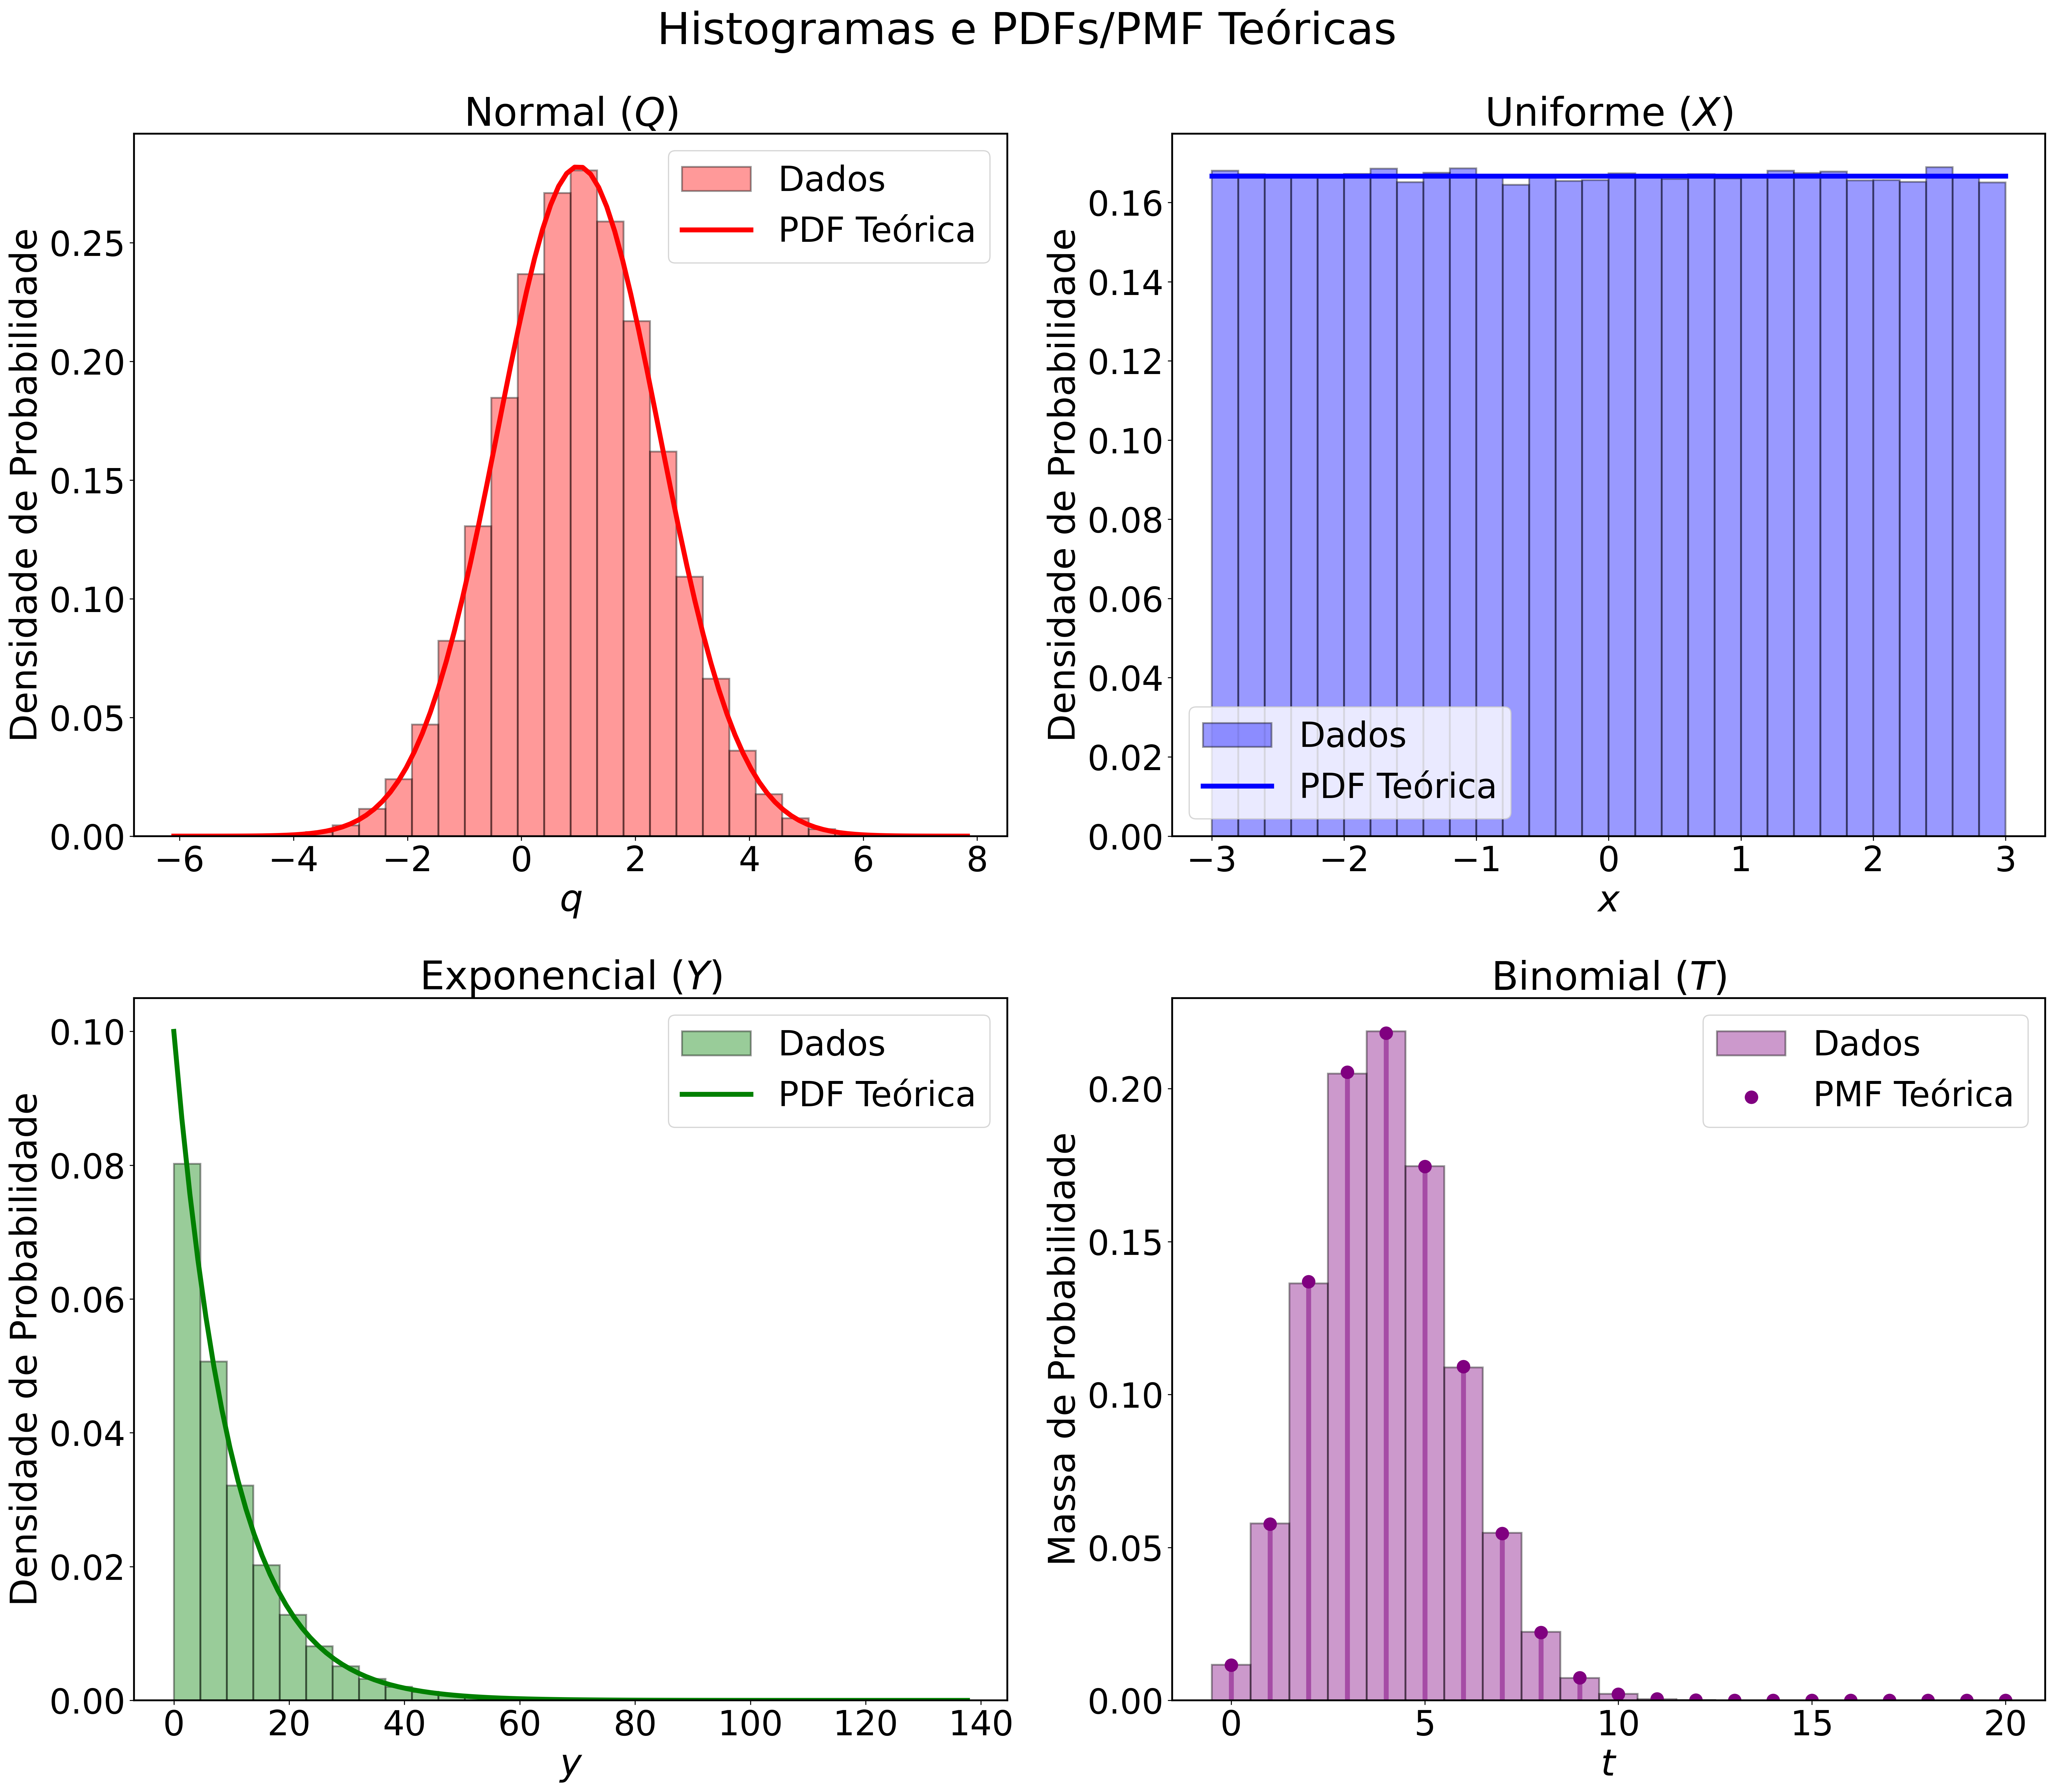

In [9]:
plt.rcParams.update({
    'font.size': 30,
    'axes.titlesize': 32,
    'axes.labelsize': 30,
    'xtick.labelsize': 28,
    'ytick.labelsize': 28,
    'legend.fontsize': 28,
    'lines.linewidth': 4,
    'lines.markersize': 10,
    'axes.linewidth': 1.5,
    'grid.linewidth': 1.5
})

fig, axs = plt.subplots(2, 2, figsize=(24, 21), dpi=300)

fig.suptitle("Histogramas e PDFs/PMF Teóricas")

# Normal Q
axs[0,0].hist(data['normal'], bins=30, density=True, alpha=0.4, color=color['normal'], edgecolor='black', linewidth=1.5, label='Dados')
x = np.linspace(min(data['normal']), max(data['normal']), 100)
axs[0,0].plot(x, pdf_normal(x, params['normal']['mu'], np.sqrt(params['normal']['sigma^2'])),
               color=color['normal'], label='PDF Teórica')
axs[0,0].set_title(rf"Normal (${random_variable_name['normal']}$)")
axs[0,0].set_xlabel(rf"${random_variable_name['normal'].lower()}$")
axs[0,0].set_ylabel("Densidade de Probabilidade")
axs[0,0].legend()

# Uniforme X
axs[0,1].hist(data['uniform'], bins=30, density=True, alpha=0.4, color=color['uniform'], edgecolor='black', linewidth=1.5, label='Dados')
x = np.linspace(params['uniform']['a'], params['uniform']['b'], 100)
axs[0,1].plot(x, pdf_uniform(x, params['uniform']['a'], params['uniform']['b']),
               color=color['uniform'], label='PDF Teórica')
axs[0,1].set_title(rf"Uniforme (${random_variable_name['uniform']}$)")
axs[0,1].set_xlabel(rf"${random_variable_name['uniform'].lower()}$")
axs[0,1].set_ylabel("Densidade de Probabilidade")
axs[0,1].legend()

# Exponencial Y
axs[1,0].hist(data['exponential'], bins=30, density=True, alpha=0.4, color=color['exponential'], edgecolor='black', linewidth=1.5, label='Dados')
x = np.linspace(min(data['exponential']), max(data['exponential']), 100)
axs[1,0].plot(x, pdf_exponential(x, params['exponential']['lambda']),
               color=color['exponential'], label='PDF Teórica')
axs[1,0].set_title(rf"Exponencial (${random_variable_name['exponential']}$)")
axs[1,0].set_xlabel(rf"${random_variable_name['exponential'].lower()}$")
axs[1,0].set_ylabel("Densidade de Probabilidade")
axs[1,0].legend()

# Binomial T
x = np.arange(0, params['binomial']['N']+1)
axs[1,1].hist(data['binomial'],  x - 0.5, density=True, alpha=0.4, color=color['binomial'], edgecolor='black', linewidth=1.5, label='Dados')
axs[1,1].scatter(x, pmf_binomial(x, params['binomial']['N'], params['binomial']['p']),
                 color=color['binomial'], label='PMF Teórica')
axs[1,1].vlines(x, 0, pmf_binomial(x, params['binomial']['N'], params['binomial']['p']),
                colors=color['binomial'], alpha=0.5)
axs[1,1].set_title(rf"Binomial (${random_variable_name['binomial']}$)")
axs[1,1].set_xlabel(rf"${random_variable_name['binomial'].lower()}$")
axs[1,1].set_ylabel("Massa de Probabilidade")
axs[1,1].legend()

plt.savefig('./figs/random_variables_distributions.pdf', bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

### (d) Construção das médias e variâncias amostrais

In [10]:
ns = [5, 10, 50]
N = 10000

sample_mean = {dist: {n:[] for n in ns} for dist in data}
sample_variance = {dist: {n:[] for n in ns} for dist in data}

for dist in data:
    print(f"\nDistribuição: {dist}")

    for n in ns:
        for _ in range(N):

            sample = np.random.choice(data[dist], size=n)

            sample_mean[dist][n].append(np.mean(sample))

            sample_variance[dist][n].append(np.var(sample, ddof=1))

        print(f"n = {n}")
        print(f"\t$E[\\bar W]$ = {np.mean(sample_mean[dist][n]):8f}")
        print(f"\t$E[S^2_W]$ = {np.mean(sample_variance[dist][n]):8f}")
        print(f"\t$|E[\\bar W] - \mu_W|$ = {abs(np.mean(sample_mean[dist][n]) - theoretical_values[dist]['mu']):8f}")
        print(f"\t$|E[S^2_W] - \sigma_W^2|$ = {abs(np.mean(sample_variance[dist][n]) - theoretical_values[dist]['sigma^2']):8f}")


Distribuição: normal
n = 5
	$E[\bar W]$ = 1.005343
	$E[S^2_W]$ = 1.983100
	$|E[\bar W] - \mu_W|$ = 0.005343
	$|E[S^2_W] - \sigma_W^2|$ = 0.016900
n = 10
	$E[\bar W]$ = 0.999830
	$E[S^2_W]$ = 1.987086
	$|E[\bar W] - \mu_W|$ = 0.000170
	$|E[S^2_W] - \sigma_W^2|$ = 0.012914
n = 50
	$E[\bar W]$ = 0.998441
	$E[S^2_W]$ = 2.009807
	$|E[\bar W] - \mu_W|$ = 0.001559
	$|E[S^2_W] - \sigma_W^2|$ = 0.009807

Distribuição: uniform
n = 5
	$E[\bar W]$ = -0.000911
	$E[S^2_W]$ = 2.984214
	$|E[\bar W] - \mu_W|$ = 0.000911
	$|E[S^2_W] - \sigma_W^2|$ = 0.015786
n = 10
	$E[\bar W]$ = 0.000660
	$E[S^2_W]$ = 2.998373
	$|E[\bar W] - \mu_W|$ = 0.000660
	$|E[S^2_W] - \sigma_W^2|$ = 0.001627
n = 50
	$E[\bar W]$ = 0.004270
	$E[S^2_W]$ = 3.005434
	$|E[\bar W] - \mu_W|$ = 0.004270
	$|E[S^2_W] - \sigma_W^2|$ = 0.005434

Distribuição: exponential
n = 5
	$E[\bar W]$ = 9.959956
	$E[S^2_W]$ = 98.792593
	$|E[\bar W] - \mu_W|$ = 0.040044
	$|E[S^2_W] - \sigma_W^2|$ = 1.207407
n = 10
	$E[\bar W]$ = 9.919729
	$E[S^2_W]$ = 98

### (e) Histogramas das média e variância amostrais

In [33]:
def plot_sample_mean_distributions(dist='normal'):
    fig, axs = plt.subplots(1, 3, figsize=(28, 10), sharex=True, sharey=True, dpi=300)

    fig.suptitle(rf'Distribuição da Média Amostral $\bar{{{random_variable_name[dist]}}}$')

    for i, n in enumerate(ns):
        axs[i].hist(sample_mean[dist][n], bins=20, density=True, alpha=0.4, color=color[dist], edgecolor='black', linewidth=1.5, label='Dados')
        axs[i].set_title(f"n = {n}")
    axs[0].set_ylabel('Densidade de Probabilidade')
    axs[1].set_xlabel(rf'$\bar{{{random_variable_name[dist].lower()}}}$')

    x = np.linspace(*axs[0].get_xbound(), 100)
    for i, n in enumerate(ns):
        axs[i].plot(x, pdf_normal(x, theoretical_values[dist]['mu'], np.sqrt(theoretical_values[dist]['sigma^2']/n)),
                    color=color[dist], label='PDF Teórica')

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.08), ncol=2, fancybox=True)

    plt.tight_layout()
    plt.savefig(f'./figs/{dist}_sample_mean_distribution.pdf', bbox_inches='tight', dpi=300)
    plt.show()


In [34]:
def plot_sample_variance_distributions(dist='normal', chi2=False):
    fig, axs = plt.subplots(1, 3, figsize=(28, 10), sharex=True, sharey=True, dpi=300)

    if chi2:
        if dist == 'normal':
            coeff_str = rf"\left[\dfrac{{(n-1)}}{{\sigma_{random_variable_name[dist]}^2}}\right]"
        else:
            raise ValueError("The sample variance (multiplied by a coefficient) only has a chi-squared distribution if the source random variable is normal.")
    else:
        coeff_str = ''

    fig.suptitle(rf"Distribuição da Variância Amostral ${coeff_str}S^2_{random_variable_name[dist]}$")

    for i, n in enumerate(ns):
        
        if chi2:
            coeff = ((n-1)/(theoretical_values[dist]['sigma^2']))
        else:
            coeff = 1.

        axs[i].hist(coeff*np.array(sample_variance[dist][n]), 
                    bins=20, density=True, alpha=0.4, color=color[dist],  hatch='//', edgecolor='black', linewidth=1.5, label='Dados')
        axs[i].set_title(f"n = {n}")
    axs[0].set_ylabel('Densidade de Probabilidade')
    axs[1].set_xlabel(rf'${coeff_str}s^2_{random_variable_name[dist]}$')

    if chi2:
        x = np.linspace(*axs[0].get_xbound(), 100)
        for i, n in enumerate(ns):
            axs[i].plot(x, pdf_chi2(x, n-1),
                        color=color[dist], label='PDF Teórica')
        
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.08), ncol=2, fancybox=True)

    chi2_str = 'chi2' if chi2 else ''
    plt.tight_layout()
    plt.savefig(f'./figs/{dist}{chi2_str}_sample_variance_distribution.pdf', bbox_inches='tight', dpi=300)
    plt.show()

#### Média amostral

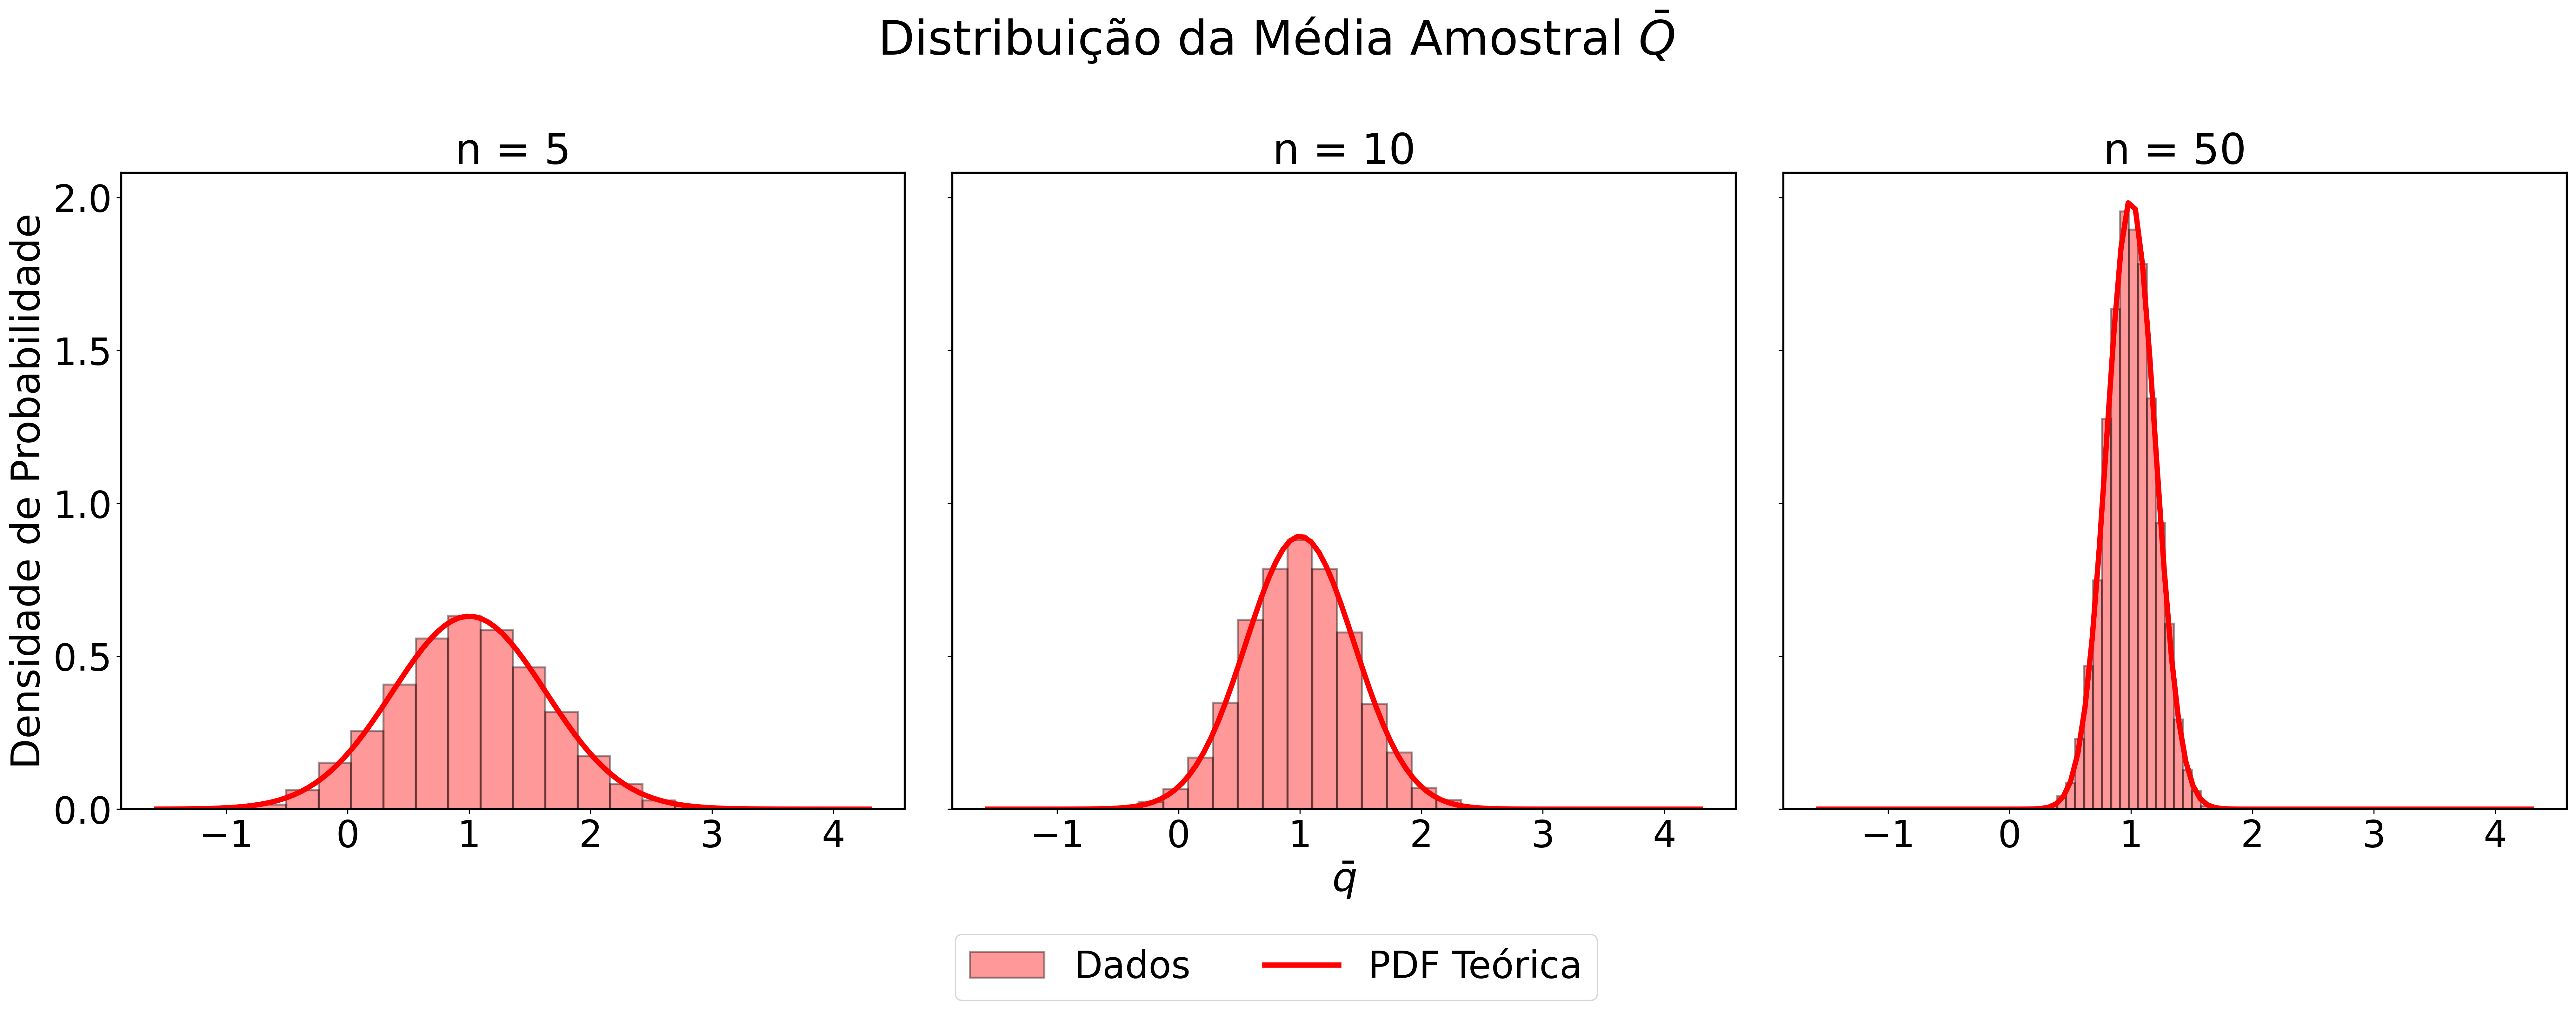

In [35]:
plot_sample_mean_distributions('normal')

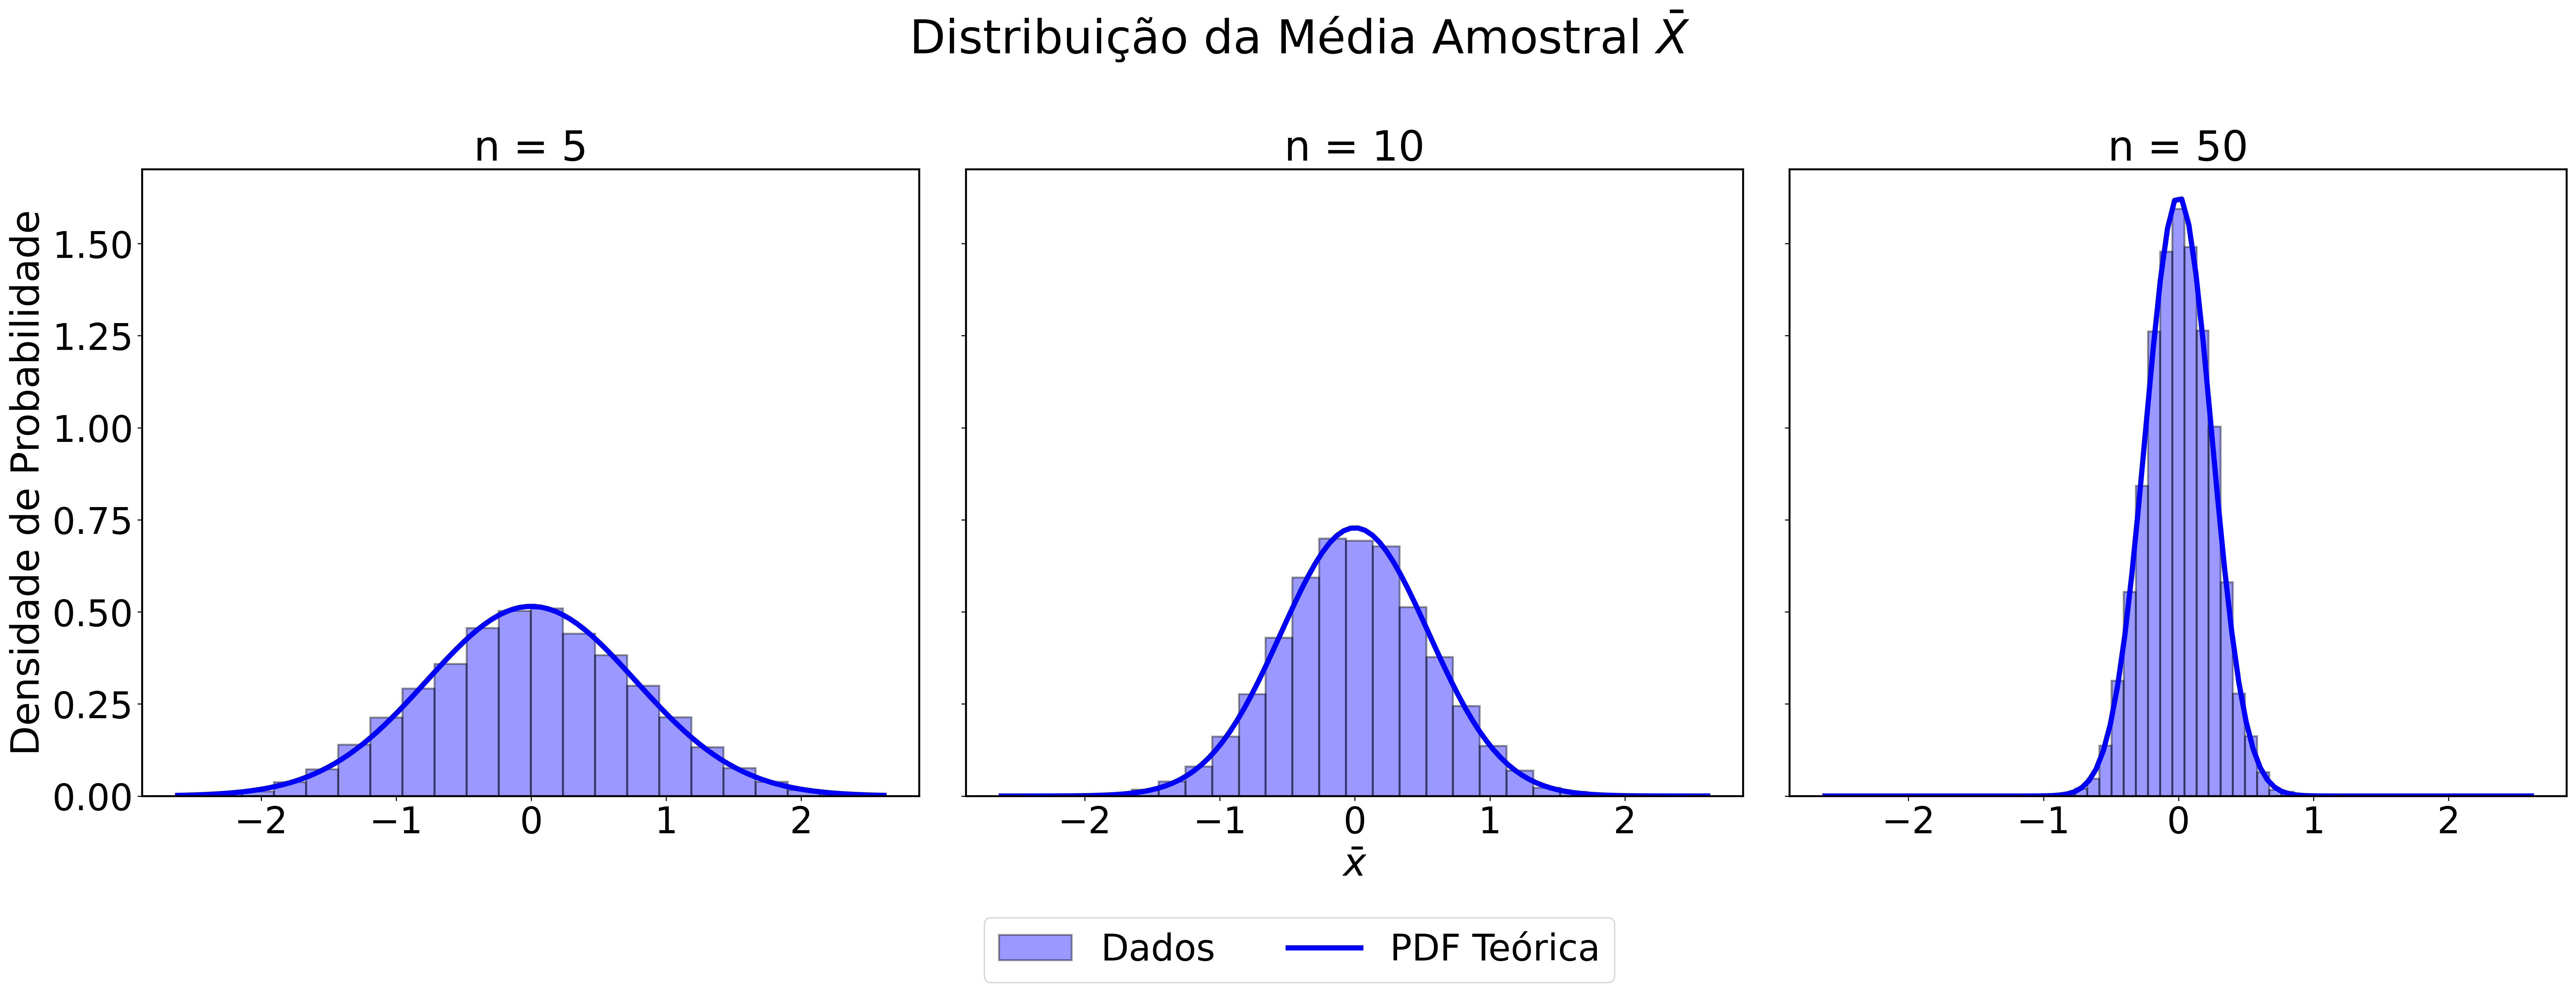

In [36]:
plot_sample_mean_distributions('uniform')

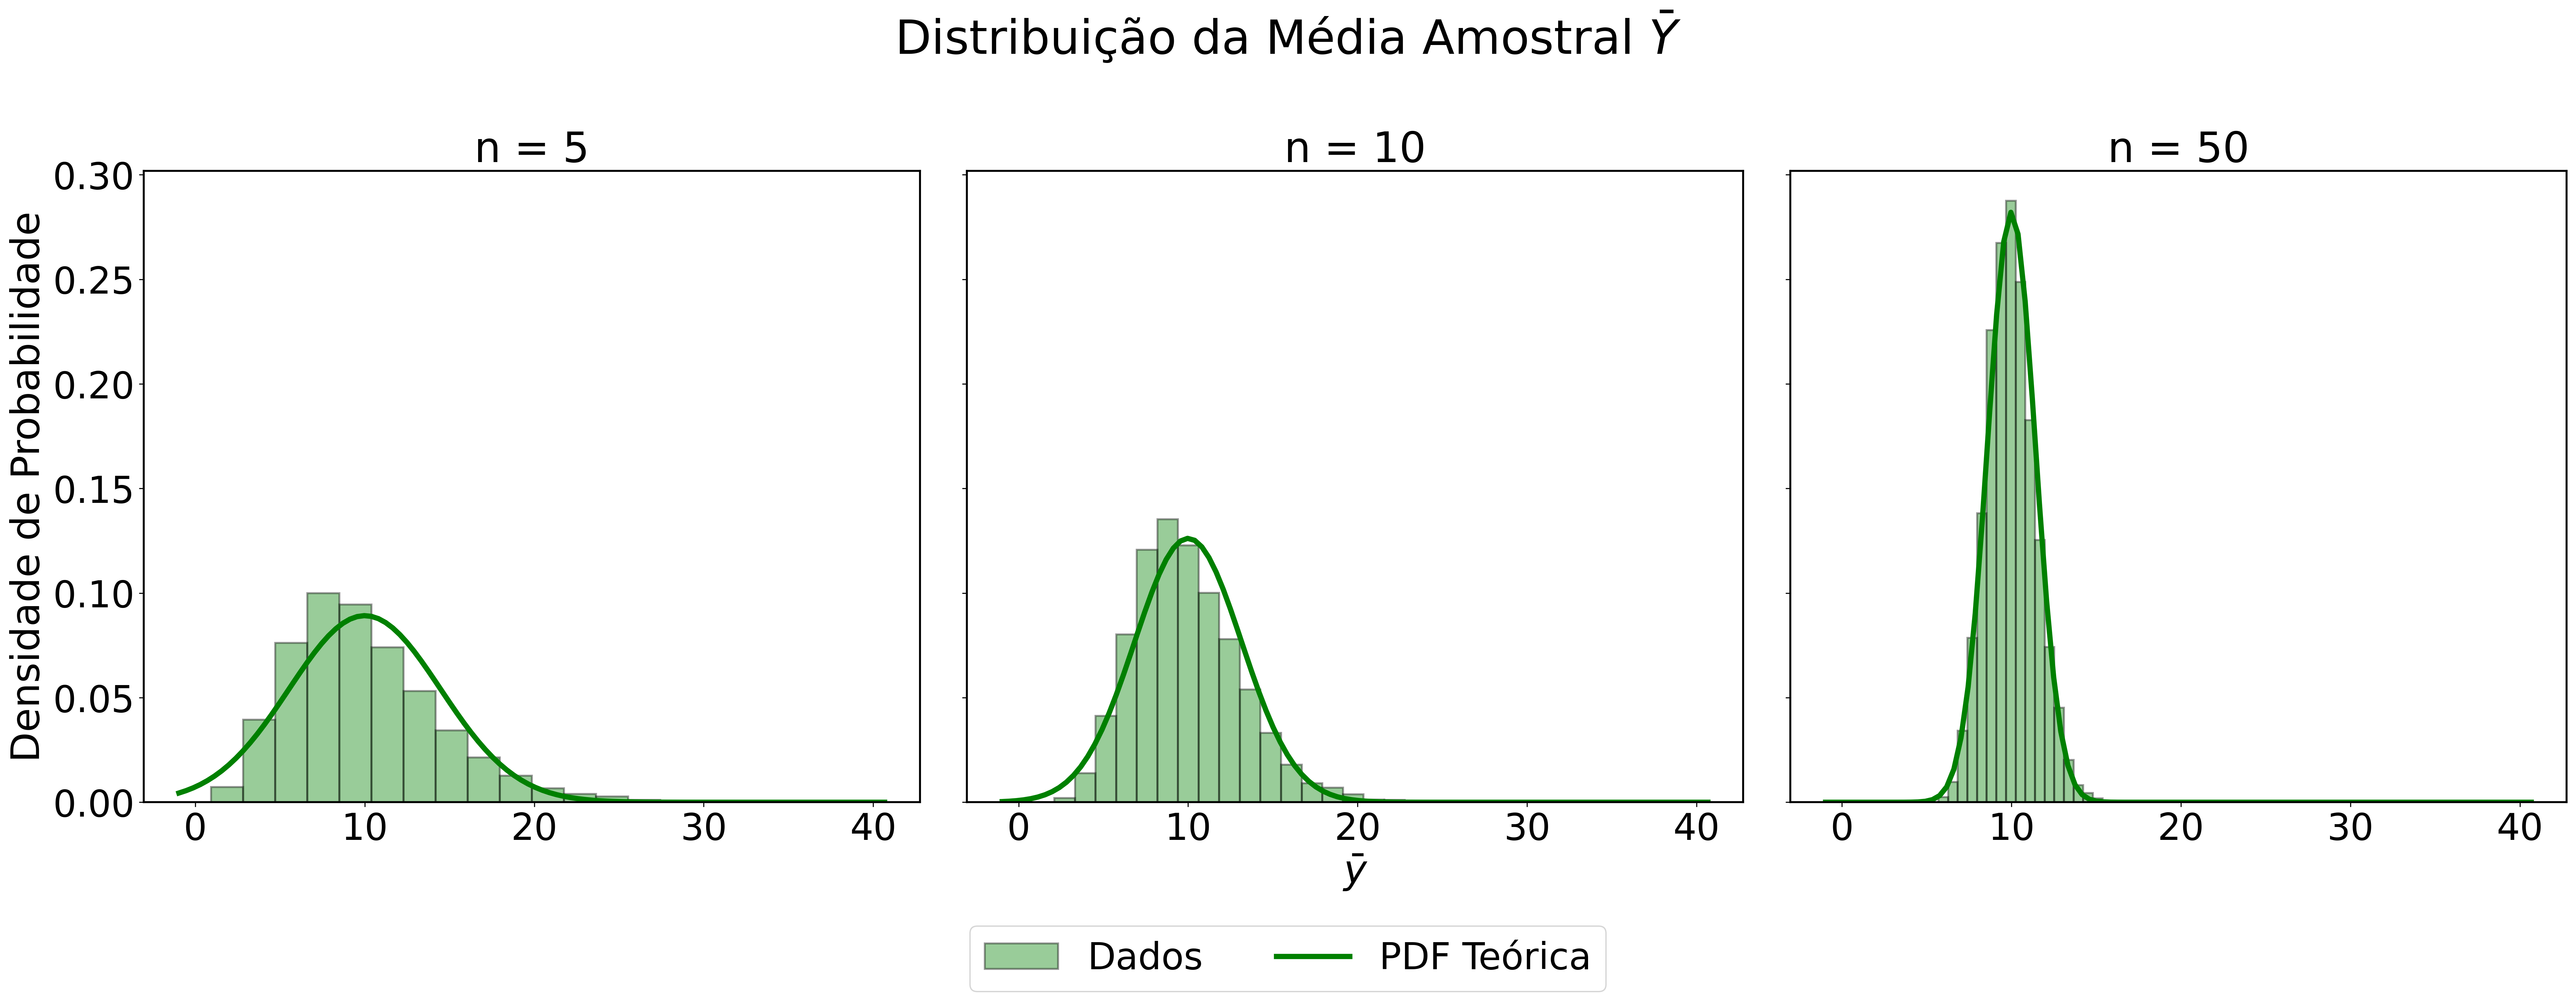

In [37]:
plot_sample_mean_distributions('exponential')

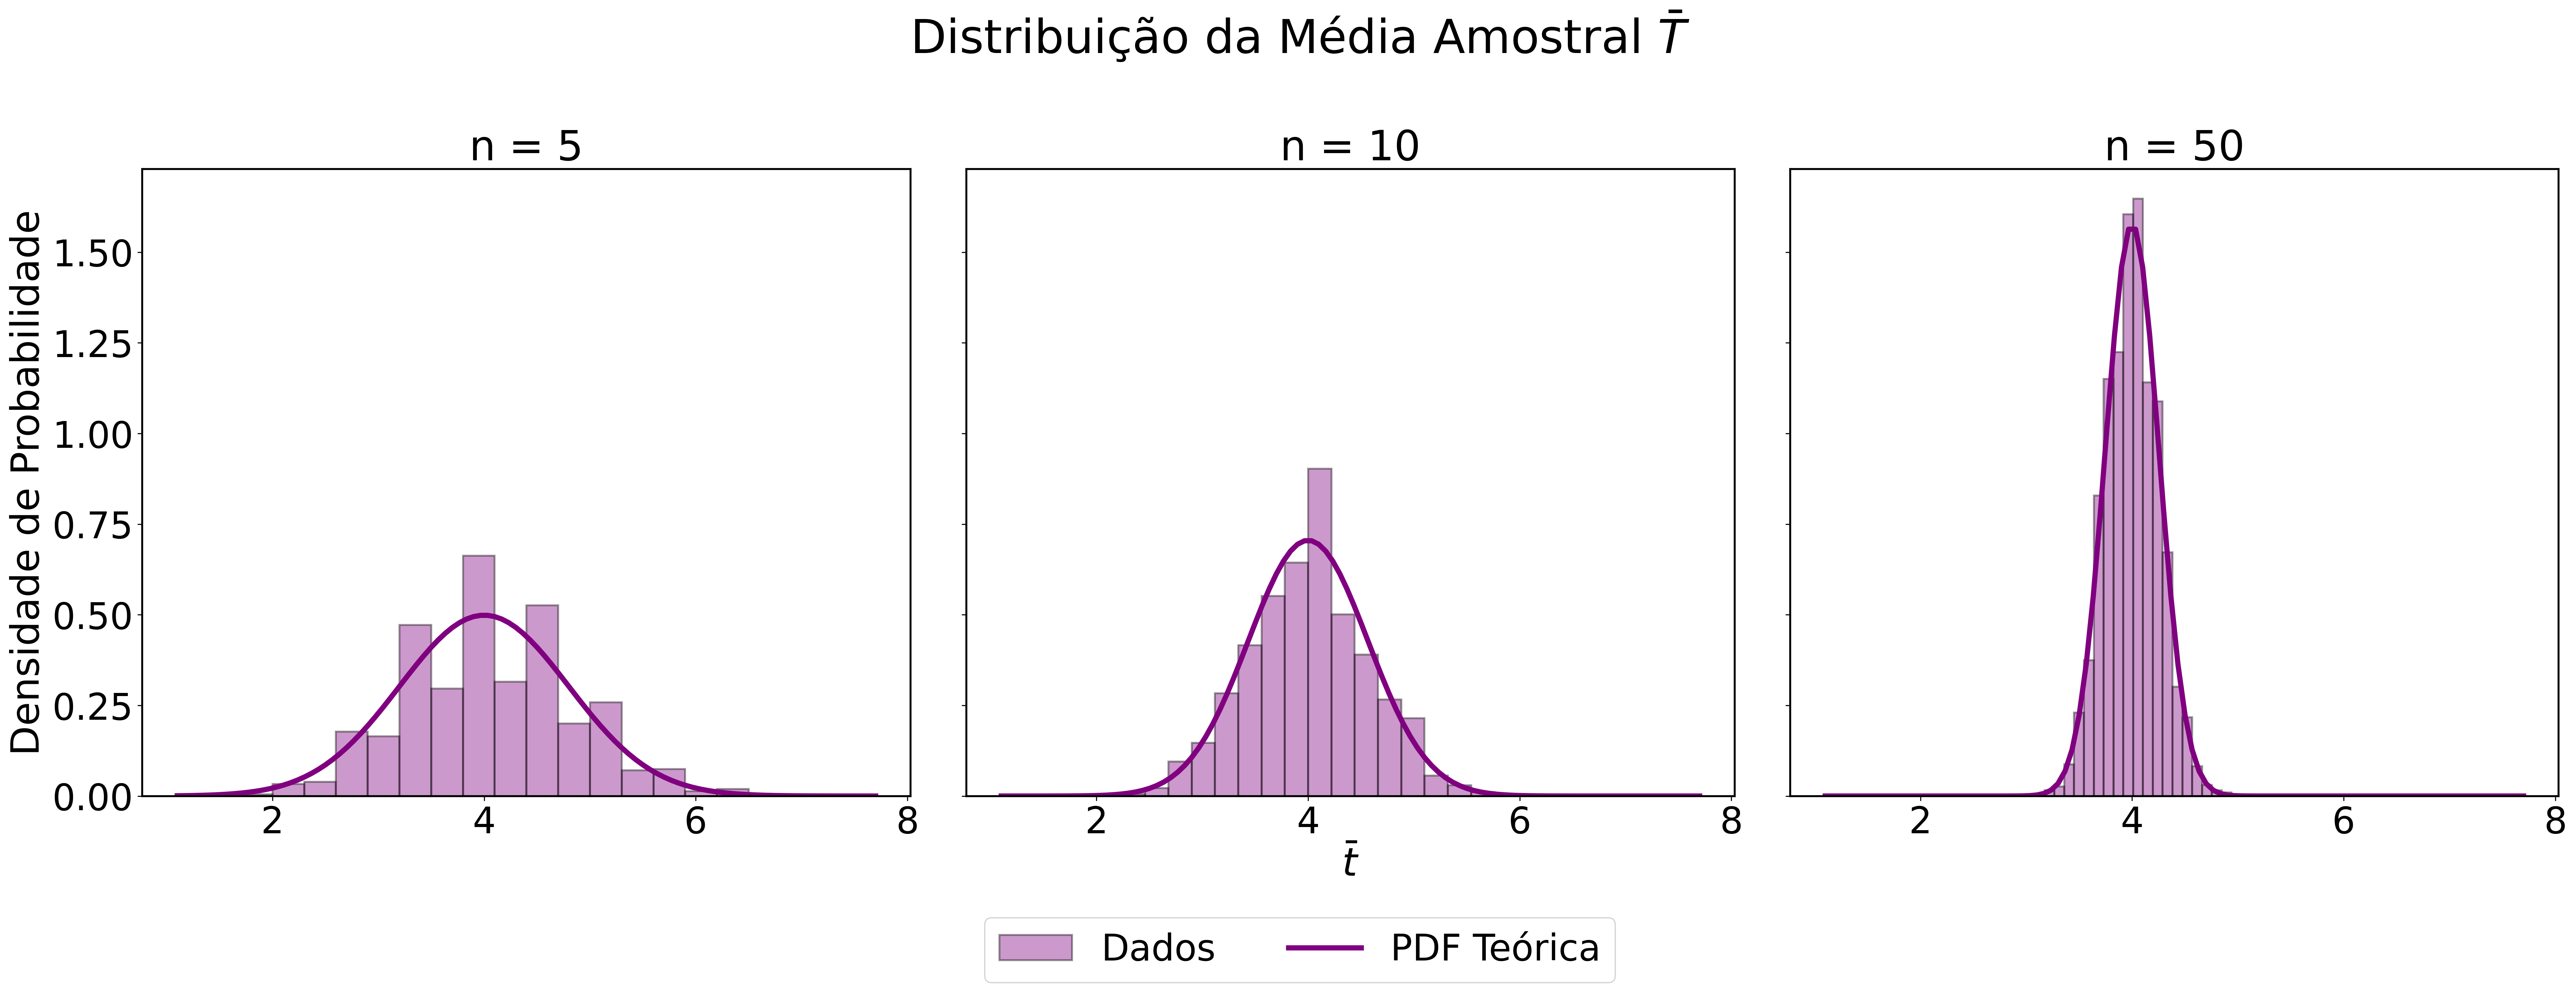

In [38]:
plot_sample_mean_distributions('binomial')

#### Variância amostral

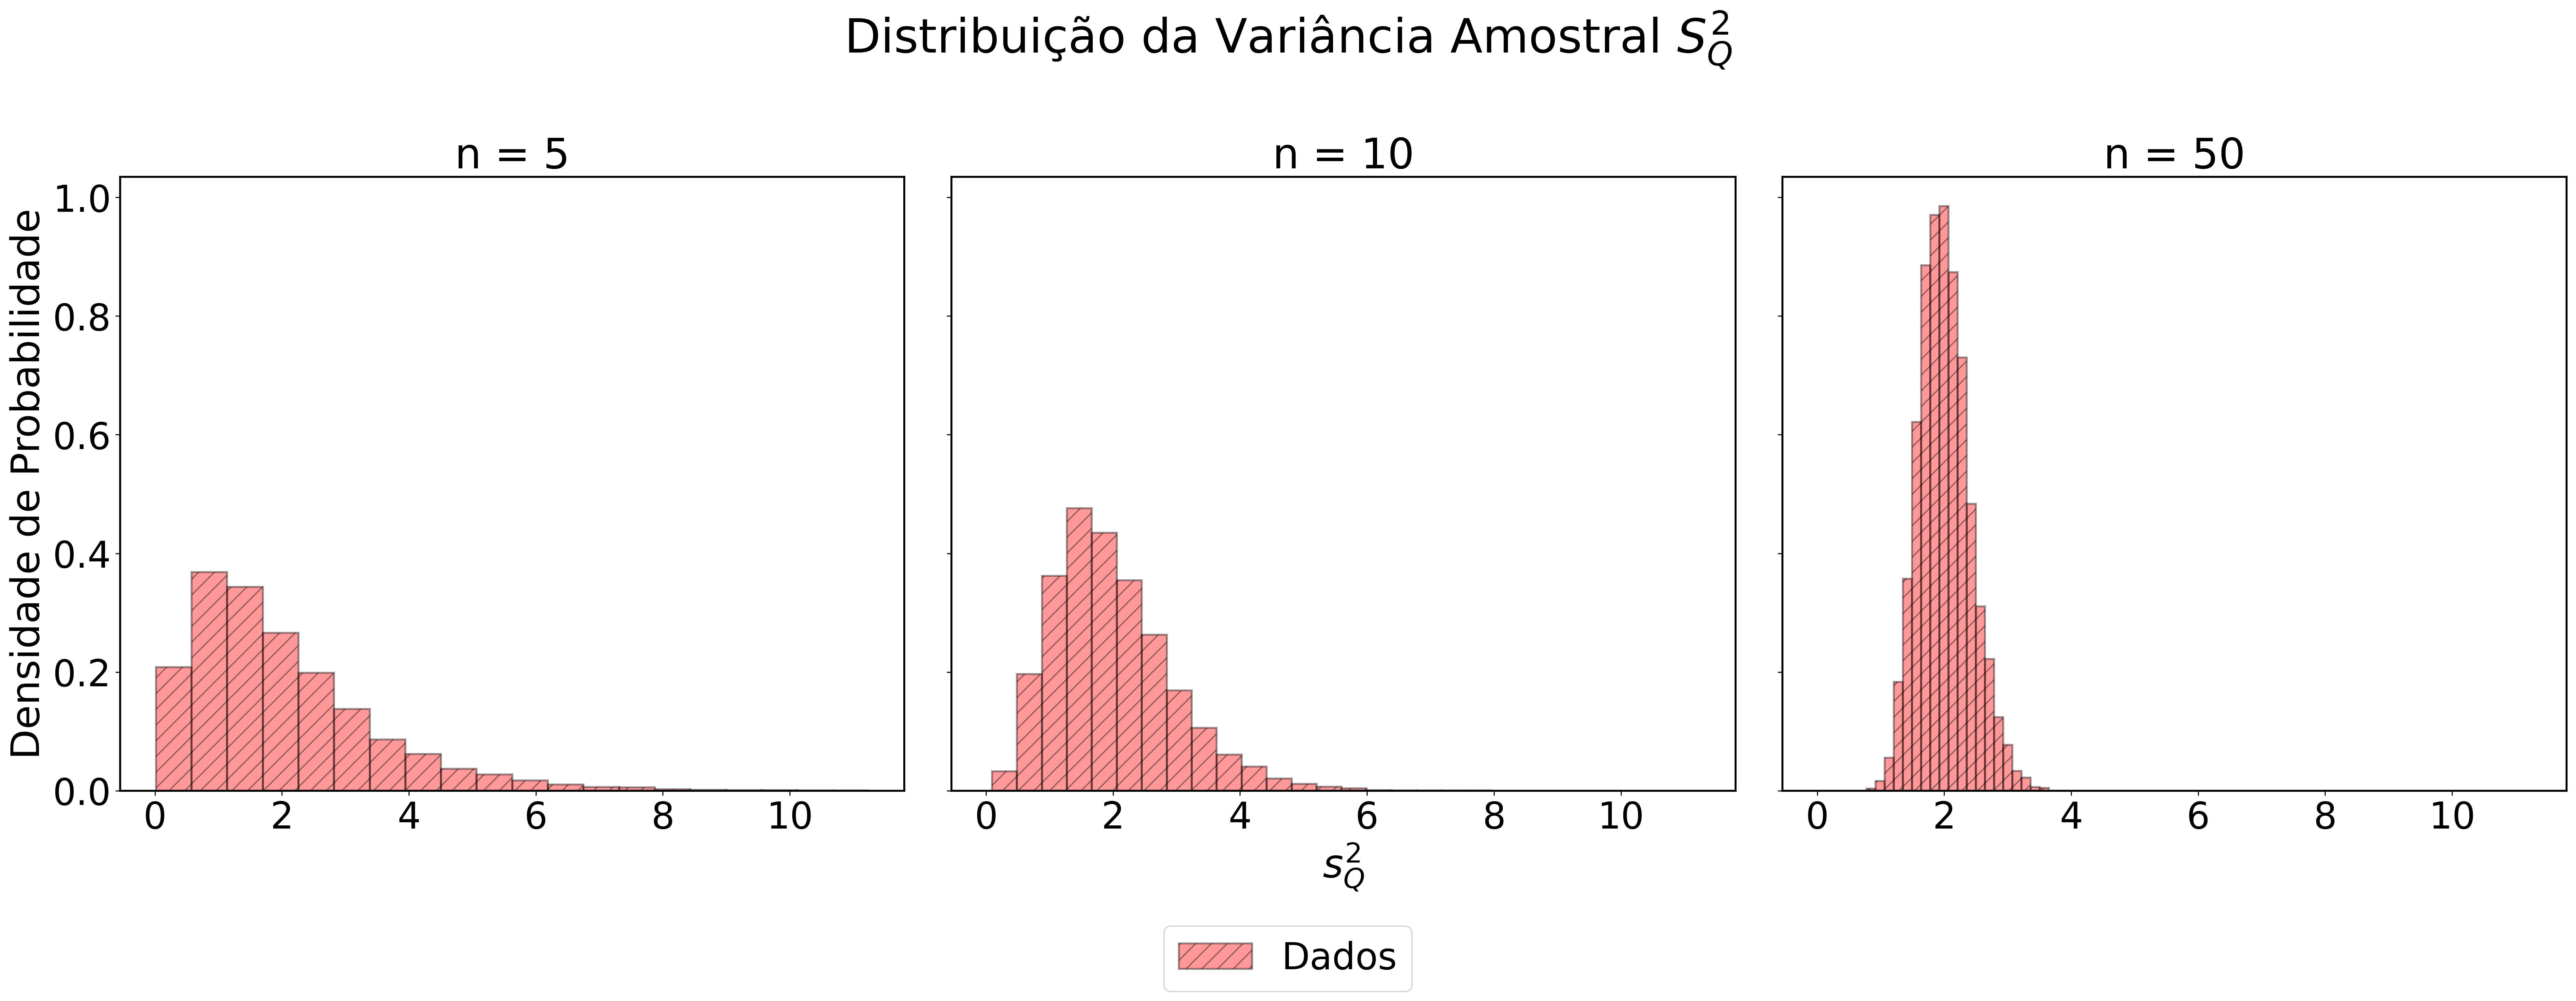

In [39]:
plot_sample_variance_distributions('normal')

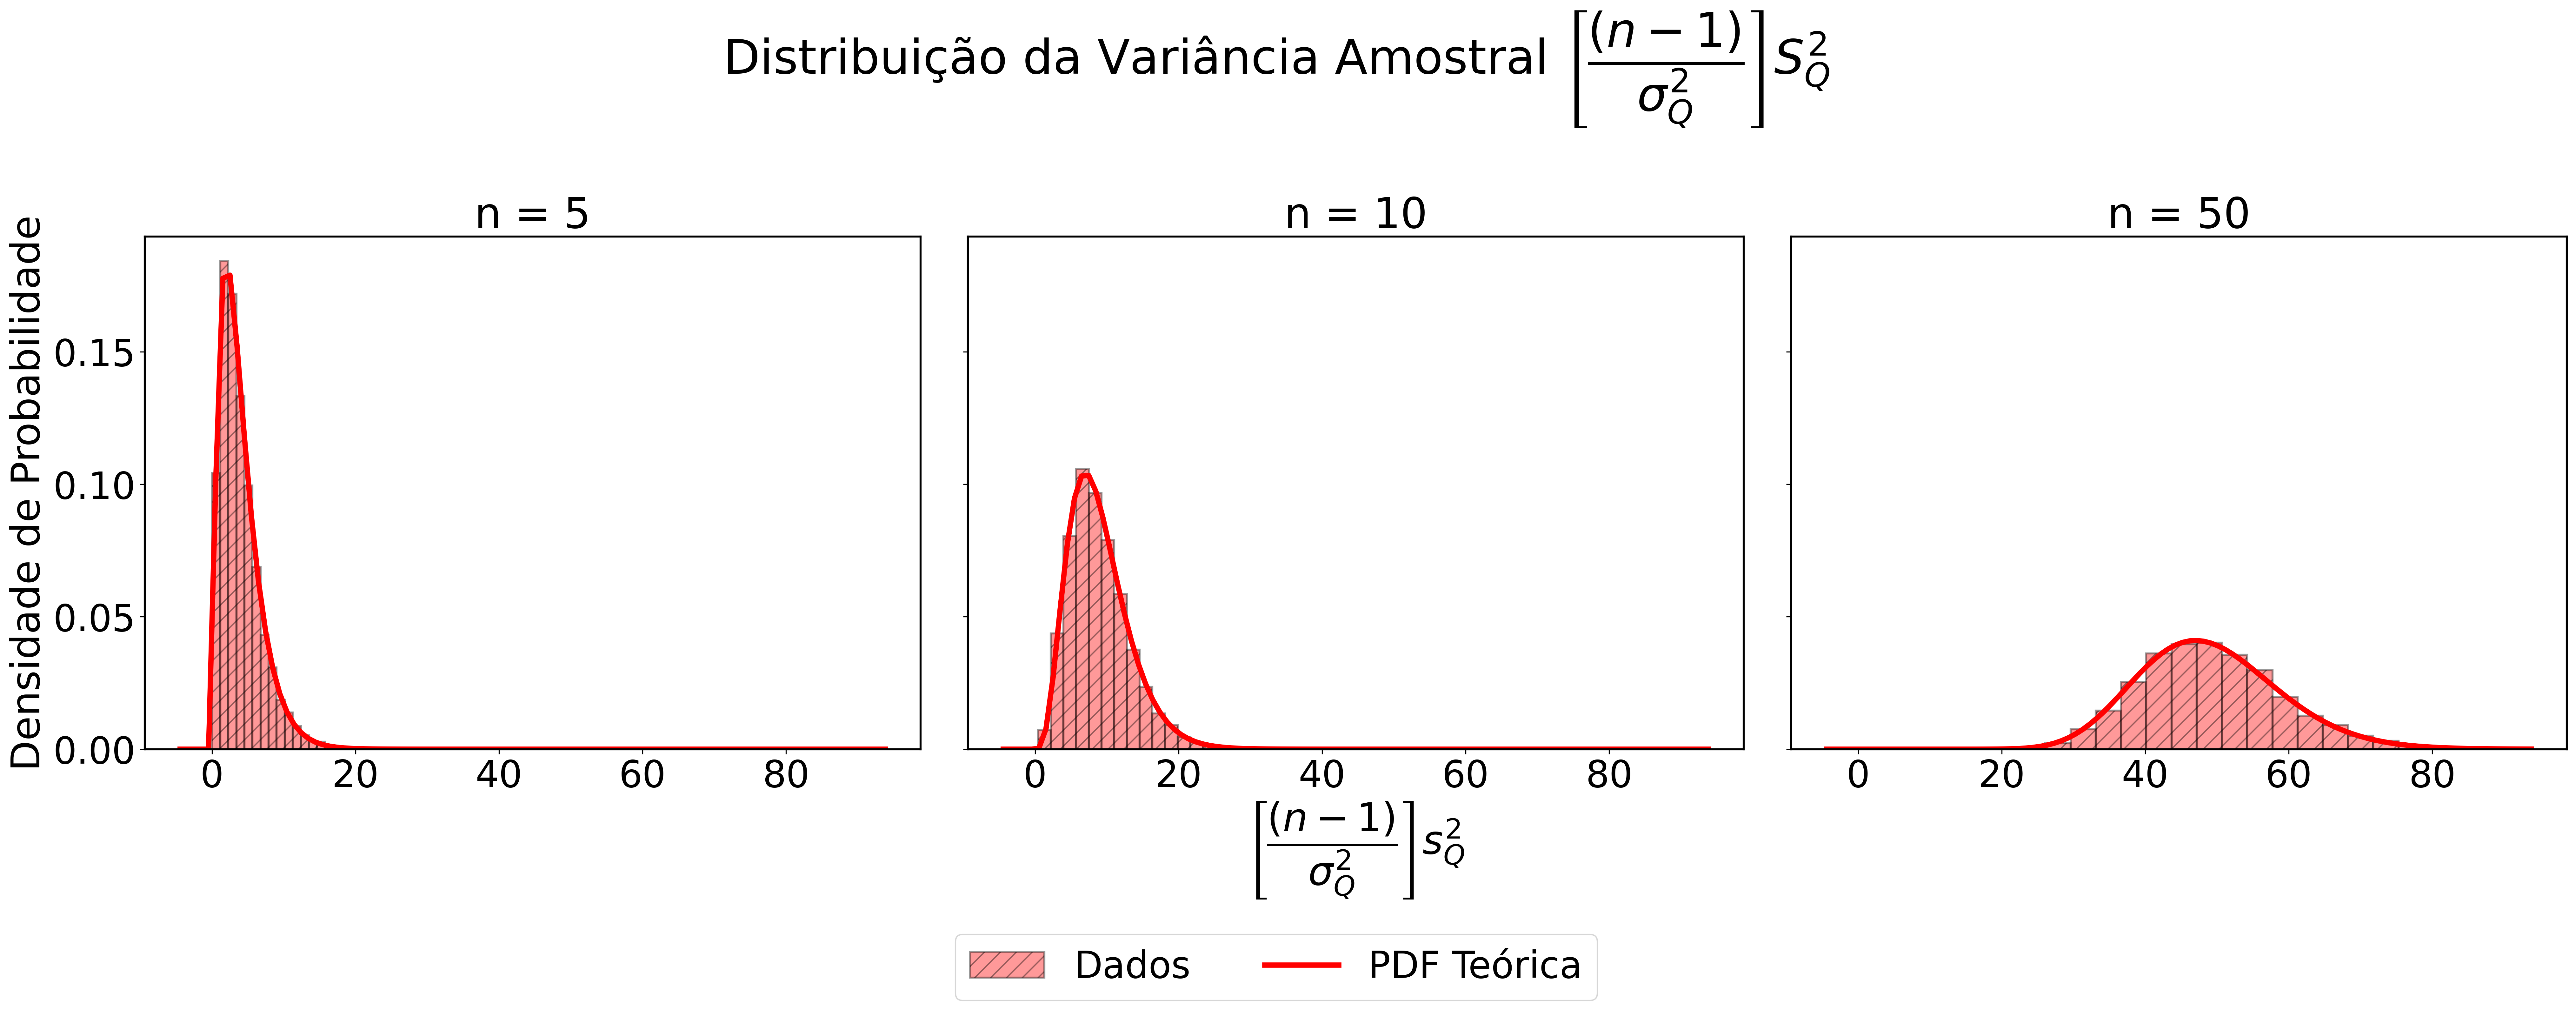

In [40]:
plot_sample_variance_distributions('normal', chi2=True)

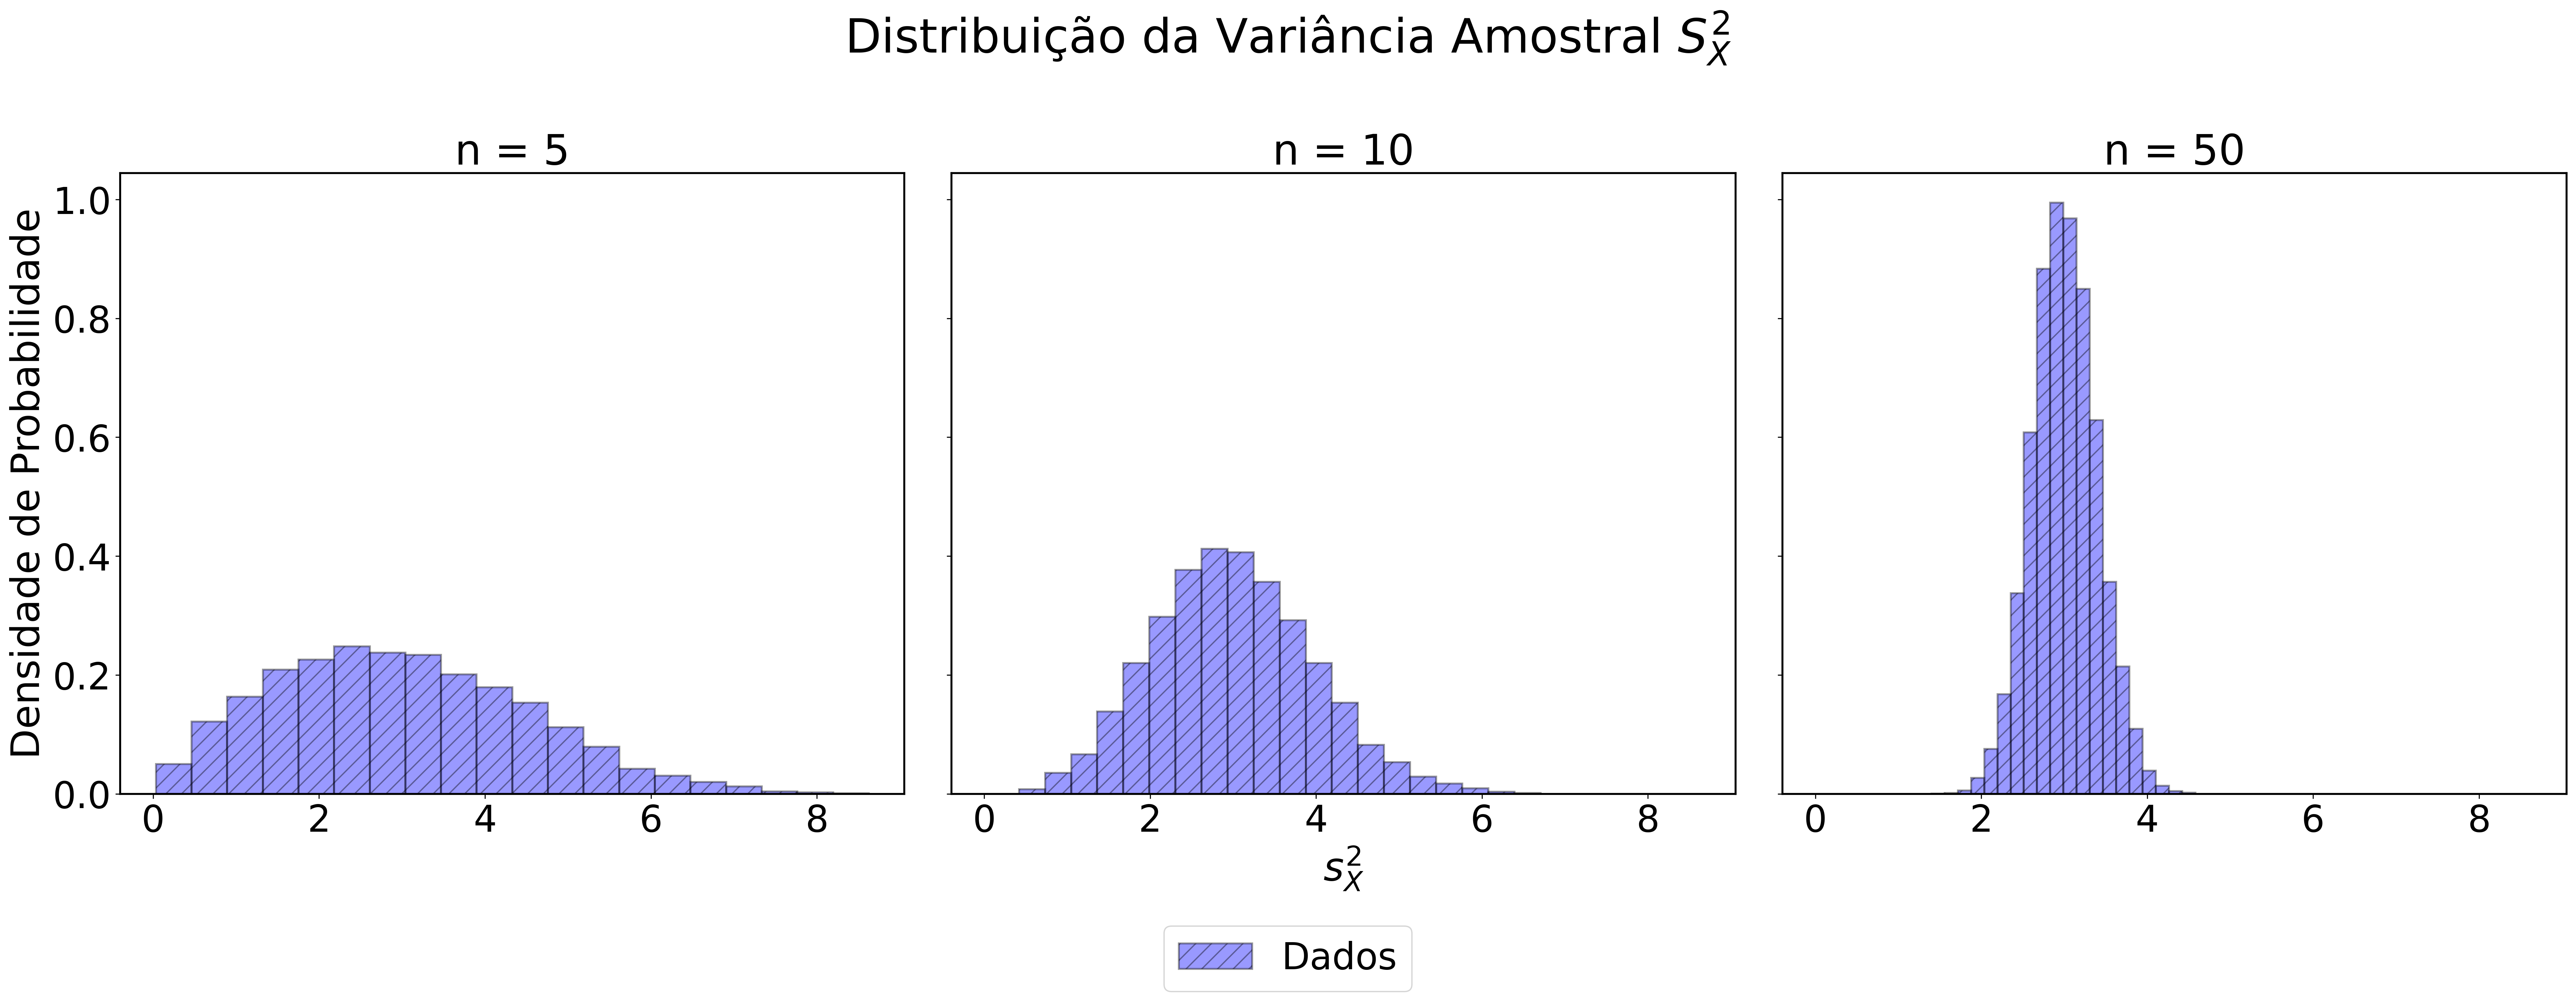

In [41]:
plot_sample_variance_distributions('uniform')

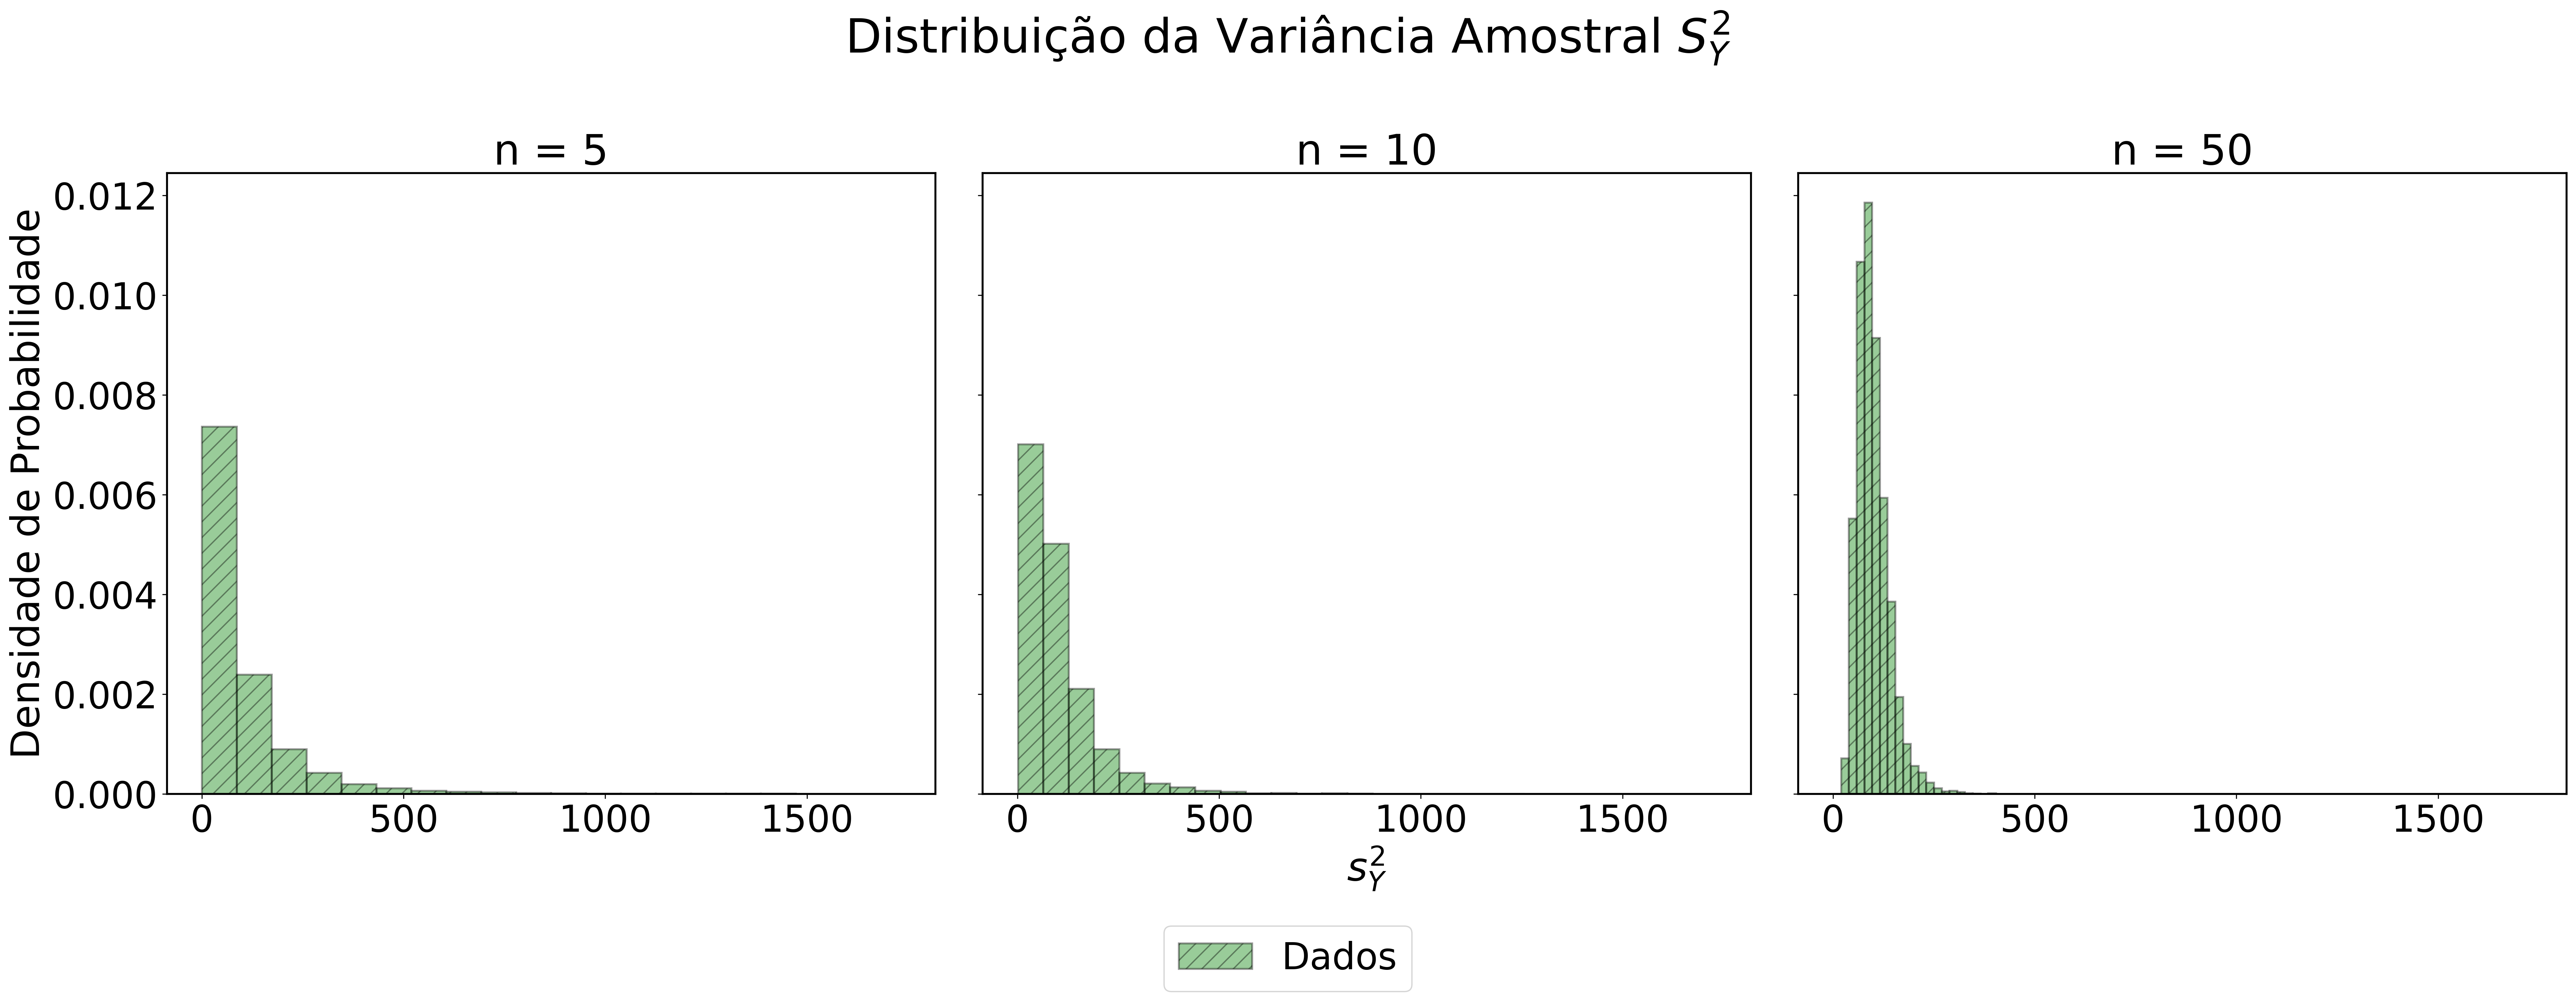

In [42]:
plot_sample_variance_distributions('exponential')

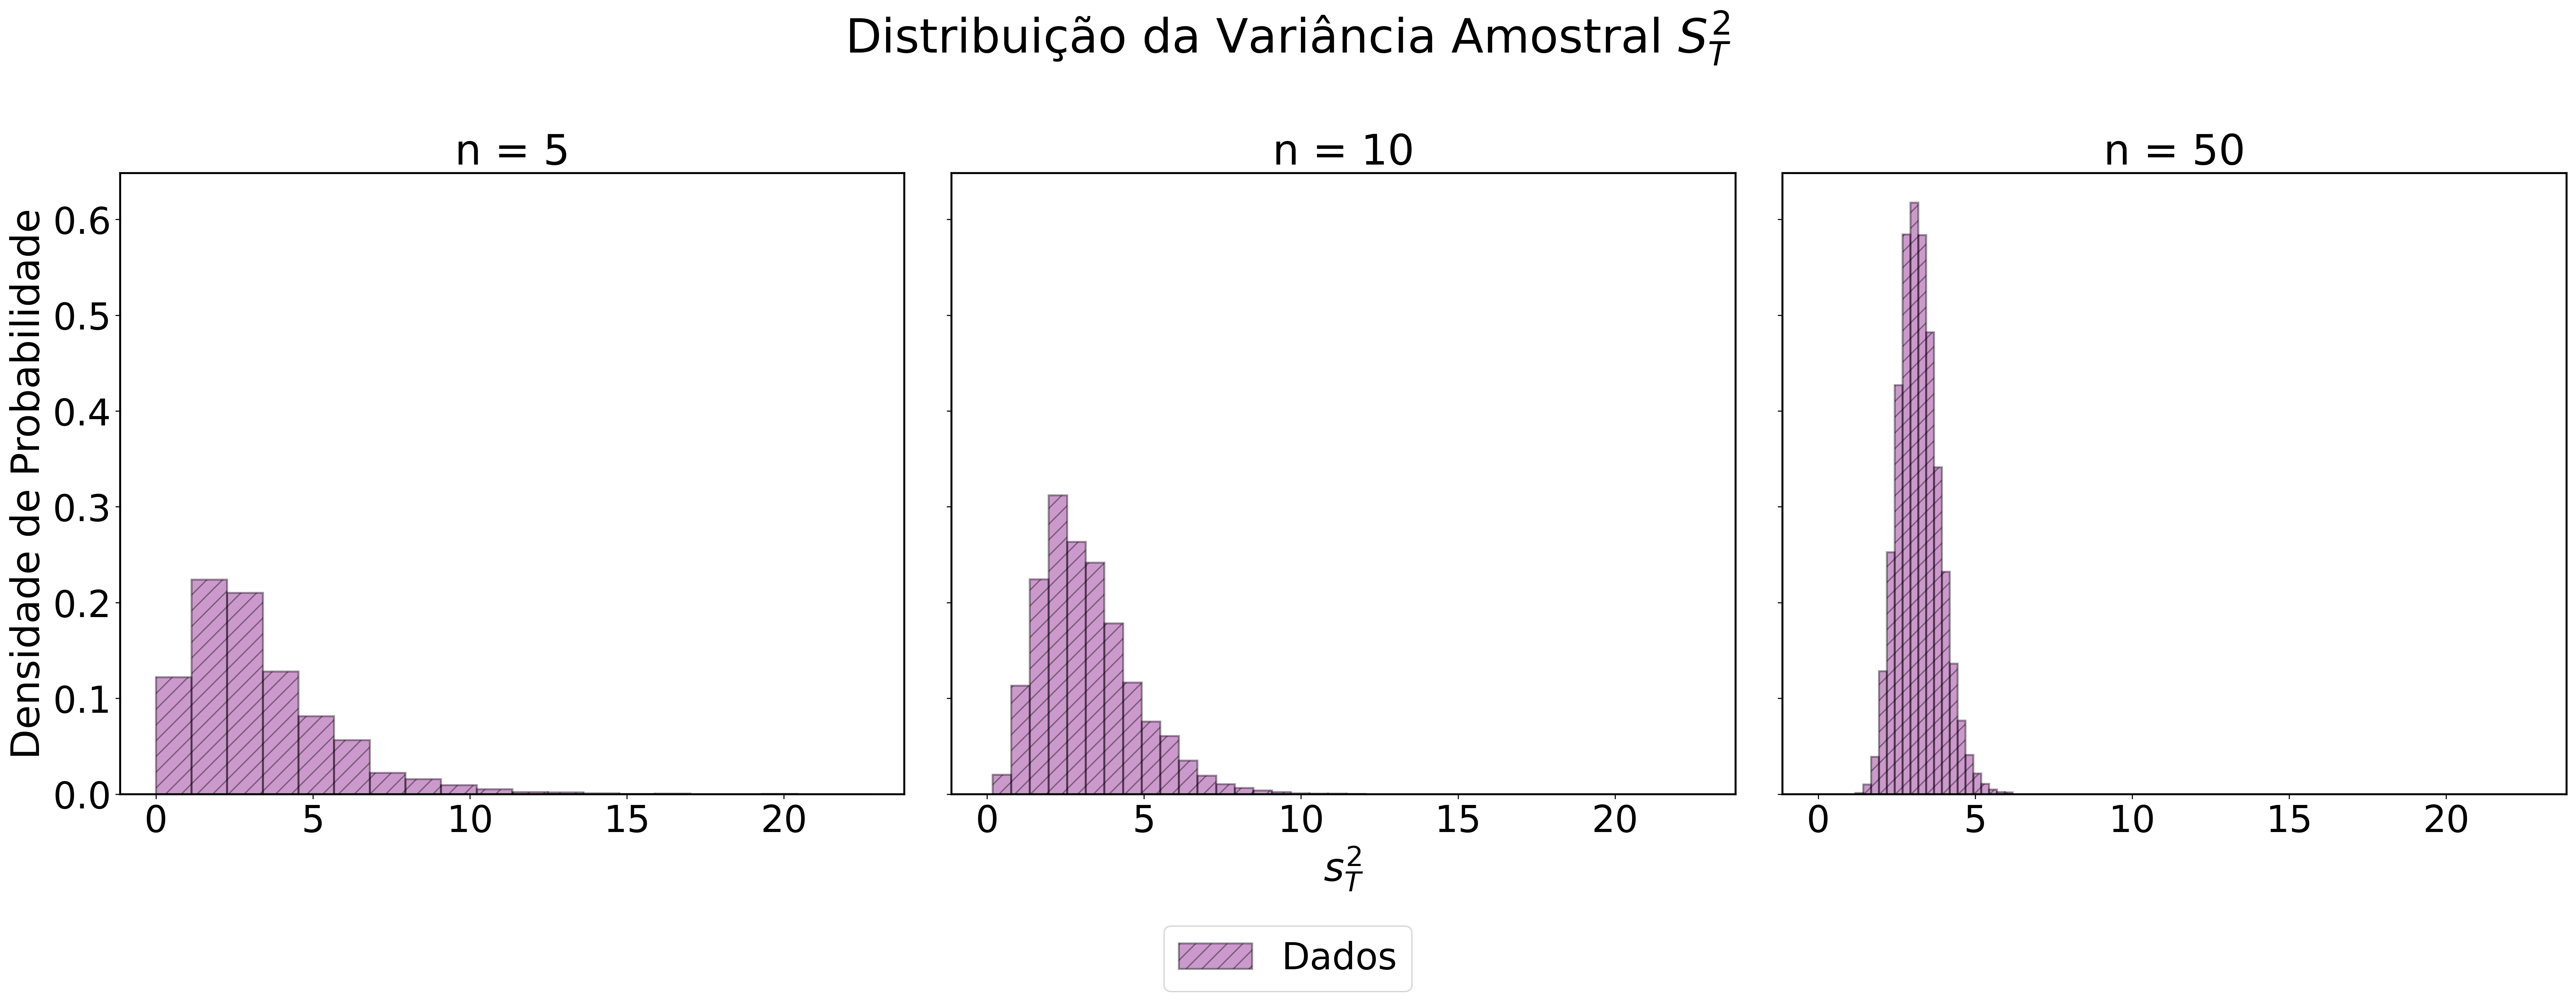

In [43]:
plot_sample_variance_distributions('binomial')